# Wrangle and Analyze Data

## Table of Contents
- [Introduction](#intro)
- [1. Gathering Data](#gather)
- [2. Assessing Data](#asses)
- [3. Cleaning Data](#clean)
- [4. Analyzing and Visualizing Data](#analyze)


<a id='intro'></a>
### Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

Your tasks in this project are as follows:

- Data wrangling, which consists of:
    - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    - Assessing data.
    - Cleaning data.
- Storing, analyzing, and visualizing your wrangled data.
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations.





In [159]:
# Importing the required libraries for the present project. 

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
% matplotlib inline


<a id='gather'></a>

## 1. Gathering data

### 1.1 Gathering the WeRateDogs Twitter archive

The WeRateDogs Twitter archive dataset was provided by the Udacity instructor as a `.csv` file.

In [2]:
# Loading the data of WeRateDogs Twitter archive

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.shape

(2356, 17)

### 1.2 Gathering the image predictions dataset

The file `image_predictions.tsv` is hosted on Udacity's serves and should be downloaded programmatically using the Requests library. 

In [4]:
# Loading the data of image predictions dataset 

# creating the folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# requesting the URL 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

# accessing the response body
#response.content

<Response [200]>

In [5]:
# open and writing the contents of the response
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
# checking the content of the folder
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
# loading the image predictions data
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Gathering JSON data by querying the Twitter API

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [8]:
# Creating an API object 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# Getting tweet JSON data via tweet ID using Tweepy
tweets_id = list(twitter_archive['tweet_id'])
tweets_list = []
for i in range(len(tweets_id)):
    print(i)
    try:
        tweet = api.get_status(tweets_id[i], tweet_mode='extended') 
        tweets_list.append(tweet._json)
    except:
        tweets_list.append({
            'id': tweets_id[i],
            'retweet_count': None,
            'favorite_count': None
        })
 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
# Writing the JSON data to a text file
with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweets_list, outfile)

In [11]:
# Reading text file, line by line
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    tweet_data = []
    for tweet in data:
        tweet_id  = tweet['id']
        retweet = tweet['retweet_count']
        favorite = tweet['favorite_count']
        tweet_data.append({'tweet_id': tweet_id,
                          'retweet_count': retweet,
                          'favorite_count': favorite})
tweet_counts = pd.DataFrame(tweet_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [12]:
tweet_counts.sample(5)

,tweet_id,retweet_count,favorite_count
1604,685906723014619143,2977.0,7697.0
349,831650051525054464,2008.0,7397.0
701,786051337297522688,160.0,1493.0
595,798701998996647937,8223.0,0.0
1771,678334497360859136,259.0,1321.0


<a id='asses'></a>
## 2. Assesing data

### 2.1 Assesing the `twitter_archive` dataset

In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
572,801285448605831168,NaN,NaN,2016-11-23 04:45:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.shape

(2356, 17)

In [17]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
twitter_archive[twitter_archive.tweet_id.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
twitter_archive.duplicated().sum()

0

In [20]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [25]:
len(twitter_archive.query('retweeted_status_id != "NaN"'))

181

In [26]:
len(twitter_archive.query('in_reply_to_status_id != "NaN"'))

78

In [27]:
twitter_archive.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

### Findings in the `twitter_archive` dataset


####  Quality Issues
**a.** Missing values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `expanded_urls` columns. 
<br> **b.** Incorrect data type in `timestamp`, `retweeted_status_id`, `retweeted_status_user_id` columns.
<br> **c.** Minimum value of the `rating_denominator` column (check if 10 is the valid minimum value).
<br> **d.** Not all tweets are dog ratings and some are retweets or replies.
<br> **e.** Not all tweets have images with it. 
<br> **f.** Incorrect assignment of "None" with data type string as a NaN value in the columns related to the dog stage. 
<br> **g.** Inaccurate records on `name` column.
<br> **h.** The records in the `source` column are not readable. 


#### Tidiness Issues

<br> **i.** Each state of dog is contained in a single column (`doggo`, `floofer`, `pupper`, `puppo`).
<br> **j.** Not all columns matter for the analysis process. 
<br> **k.** The `favorite_count` and `retweet_count` (`tweet_counts` dataset) are in an individual piece of data that must be merged with the `twitter_archive` dataset. 


### Assesing the `image_predictions` dataset 

In [28]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True


In [30]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
image_predictions.shape

(2075, 12)

In [32]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [34]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
image_predictions.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
250     0.071124
145     0.071536
680     0.072885
701     0.081101
1831    0.082489
18      0.086502
109     0.088530
568     0.088540
301     0.089165
1627    0.090341
1503    0.090341
954     0.090508
277     0.096063
2074    0.097049
664     0.097232
789     0.097500
515     0.098283
1664    0.099804
731     0.100499
1723    0.100896
1037    0.105171
247     0.107317
876     0.107948
866     0.110587
1245    0.111493
          ...   
76      0.999091
1988    0.999120
2045    0.999201
863     0.999223
1872    0.999281
1548    0.999306
95      0.999335
611     0.999365
1711    0.999403
512     0.999484
168     0.999614
107     0.999647
1796    0.999715
1455    0.999823
1687    0.999828
1725    0.999833
331     0.999834
1014    0.999837
594     0.999846
475     0.999876
865     0.999885
45      0.999888
1447    0.999916
242     0.999924
230     0.999945
1372    0.999953
149     0.999956
1229    0.9999

In [37]:
len(image_predictions.query('p1_dog == True'))/image_predictions.shape[0]

0.7383132530120482

### Findings in the `image_predictions` dataset

#### Quality Issues
**a.** Duplicated from `jpg_url`.
<br> **b.** There are 2356 tweets in the `twitter_archive` dataframe and 2075 rows in the `image_predictions` dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures. 

#### Tidiness Issues
**c.** Not all columns matter for the analysis process. 
<br>**d.** The `twitter_archive` and `image_predictions` datasets must be merged in a single dataframe.



### 2.3 Assesing the `tweet_counts` dataset

In [38]:
tweet_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7957.0,37188.0
1,892177421306343426,5907.0,31979.0
2,891815181378084864,3904.0,24085.0
3,891689557279858688,8110.0,40501.0
4,891327558926688256,8790.0,38729.0


In [39]:
tweet_counts.sample(5)

,tweet_id,retweet_count,favorite_count
2013,672231046314901505,997.0,1813.0
355,830956169170665475,1547.0,8214.0
2049,671504605491109889,3517.0,6944.0
1096,736365877722001409,1277.0,4073.0
744,780192070812196864,2347.0,9068.0


In [40]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
retweet_count     2333 non-null float64
favorite_count    2333 non-null float64
dtypes: float64(2), int64(1)
memory usage: 55.3 KB


In [41]:
tweet_counts.isnull().sum()

tweet_id           0
retweet_count     23
favorite_count    23
dtype: int64

In [42]:
tweet_counts[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2333.000000,2333.000000
mean,2797.463781,7752.302186
std,4735.085627,12034.418742
min,1.000000,0.000000
25%,561.000000,1347.000000
50%,1307.000000,3378.000000
75%,3258.000000,9513.000000
max,80396.000000,160676.000000


### Findings in the `tweet_counts ` dataset

#### Quality Issues
**a.** Missing values in `retweet_count`, and `favorite_count` columns.
<br> **b.** Incorrect data types in `retweet_count`, and `favorite_count` columns.


#### Tidiness Issues
**c.** This piece of data must be merged with the others datasets. 

<a id='clean'></a>
### 3. Cleaning Data

In [88]:
# Creating a copy of each piece of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_counts_clean = tweet_counts.copy()

#### Issues a/d `twitter_archive` dataset

**Issue:** **a.** Missing values in multiple columns. **d.** Not all tweets are dog ratings and some are retweets or replies. 
<br> **Define:** The non-null values `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns refers to those tweets id that are replies and retweets. Therefore, they need to been removed and kept the original tweets only. 
<br> **Code:**

In [89]:
# selecting index from rows based on condition (retweets and replies)
index_reply_retweet = twitter_archive_clean[(twitter_archive_clean['in_reply_to_status_id'].isna() == False) | (twitter_archive_clean['retweeted_status_id'].isna() == False)].index      

# deleting replies and retweets 
twitter_archive_clean = twitter_archive_clean.drop(index_reply_retweet)

**Test:**

In [90]:
print('Number of retweets: \n', len(twitter_archive_clean.query('retweeted_status_id != "NaN"'))) 
print('Number of replies: \n', len(twitter_archive_clean.query('in_reply_to_status_id != "NaN"')))

Number of retweets: 
 0
Number of replies: 
 0


#### Issue i `twitter_archive` dataset

**Issue:** **i.** Each state of dog is contained in a single column (doggo, floofer, pupper, puppo). 
<br> **Define:** Melt the doggo, floofer, pupper, and puppo columns to a dog stage. 
<br> **Code:**

In [91]:
# Creating the id_vars and value_vars
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
remain_columns = [x for x in twitter_archive_clean.columns.tolist() if x not in melt_columns]

# Melting the dog stage column
twitter_archive_clean= pd.melt(twitter_archive_clean, id_vars=remain_columns, 
                               value_vars=melt_columns, var_name='stage', value_name='dog_stage')

# Deleting the stage column
twitter_archive_clean = twitter_archive_clean.drop('stage', axis=1)

# Deleting the duplicated rows in dog stage column
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')


**Test:**

In [92]:
twitter_archive_clean['dog_stage'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

#### Issue j `twitter_archive` dataset

**Issue:** **j.** Not all columns matter for the analysis process. 
<br> **Define:** Deleting those columns that are not relevant for the analysis process.
<br>**Code:**

In [93]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                                    'retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], inplace=True)

**Test:**

In [94]:
list(twitter_archive_clean.columns.values.tolist())

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### Issue k `twitter_archive` dataset

**Issue:** **k.** The `favorite_count` and `retweet_count` (`tweet_counts` dataset) are in an individual pieces of data that must be merged with the `twitter_archive` dataset. 
<br> **Define:** Merge the tweet_counts and twitter_archive datasets.
<br>**Code:**

In [95]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_counts, on='tweet_id')

**Test:**

In [96]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
retweet_count         2090 non-null float64
favorite_count        2090 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 196.6+ KB


#### Issue d `image_predictions` dataset

**Issue:** **d.** The `twitter_archive` and `image_predictions` datasets must be merged in a single dataframe.
<br> **Define:** Merge the `twitter_archive` and `image_predictions` datasets. 
<br>**Code:**

In [97]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id')

**Test:**

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null f

#### Issue b `twitter_archive` dataset

**Issue:** **b.** Incorrect data type in `timestamp`, `retweeted_status_id`, `retweeted_status_user_id` columns.
<br> **Define:** Convert the `timestamp` column's data type from string to datetime. The `retweeted_status_id` and `retweeted_status_user_id` columns does not exist anymore at this point. 
<br>**Code:**

In [99]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str.slice(start=0, stop=-6)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)


**Test:**

In [100]:
twitter_archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_stage                     object
retweet_count                float64
favorite_count               float64
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
dtype: object

#### Issue f `twitter_archive` dataset

**Issue:** **f.** Incorrect assignment of "None" with data type string as a NaN value in the columns related to the dog stage.
<br> **Define:** Assign None to the missing values in the dog stage column.  
<br>**Code:**

In [101]:
stages = ['dog_stage']

for dog_stage in stages:
    twitter_archive_clean.loc[twitter_archive_clean[dog_stage] == 'None', dog_stage] = None

**Test:**

In [102]:
print('Number of None values in dog_stage column: \n', twitter_archive_clean.dog_stage.isnull().sum())

Number of None values in dog_stage column: 
 1668


#### Issue e `twitter_archive` dataset

**Issue:** **e.** Not all tweets have images with it. 
<br> **Define:** Drop rows that represents tweets without images. 
<br>**Code:**

In [103]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

**Test:**

In [104]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

#### Issue h `twitter_archive` dataset

**Issue:** **h.** The records in the `source` column are not readable. 
<br> **Define:** Fix the format of the source column by dropping the html tags. 
<br>**Code:**

In [105]:
import re

tags_to_drop = re.compile(r'<[^>]+>')

def drop_tags(text):
    return tags_to_drop.sub('', text)

twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(drop_tags)

**Test:**

In [106]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Issue c `twitter_archive` dataset

**Issue:** **c.** Minimum and maximum values of the `rating_denominator` column. 
<br> **Define:** As is shown below, the rating denominator different to 10 are in 17 records in total, so I decided to remove them from the dataframe.
<br>**Code:**

In [107]:
# Checking for the ratings denominator != 10
len(twitter_archive_clean.query('rating_denominator != 10'))

17

In [108]:
# Removing the ratings demoninator != 10
index_denominator = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].index

twitter_archive_clean = twitter_archive_clean.drop(index_denominator)


**Test:**

In [109]:
len(twitter_archive_clean.query('rating_denominator != 10'))

0

#### Issue a `image_predictions` dataset

**Issue:** **a.** Duplicated from `jpg_url`.
<br> **Define:** The `image_predictions`  dataset has been merged with the `twitter_archive` dataset at this point. Remove duplicated values from the jpg_url column.
<br>**Code:**

In [161]:
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=('jpg_url'))

**Test:**

In [162]:
twitter_archive_clean[twitter_archive_clean.duplicated(['jpg_url'])]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Issue  a `tweet_counts` dataset

**Issue:** **a.** Missing values in `retweet_count`, and `favorite_count` columns.
<br> **Define:** The tweet_counts dataset has been merged with the twitter_archive dataset at this point. I decided to remove the missing values from those columns. 
<br>**Code:**

In [112]:
# selecting index from rows based on condition (retweets and replies)
index_none_values = twitter_archive_clean[(twitter_archive_clean['retweet_count'].isnull() == True) | (twitter_archive_clean['favorite_count'].isnull() == True)].index      

# deleting replies and retweets 
twitter_archive_clean = twitter_archive_clean.drop(index_none_values)

**Test:**

In [113]:
twitter_archive_clean[['retweet_count', 'favorite_count']].isnull().sum()

retweet_count     0
favorite_count    0
dtype: int64

#### Issue  b `tweet_counts` dataset

**Issue:** **b.** Incorrect data types in `retweet_count`, and `favorite_count` columns.
<br> **Define:** The `tweet_counts` dataset has been merged with the `twitter_archive` dataset at this point. Convert the `retweet_count`, and `favorite_count` columns data type from float to int. 
<br>**Code:**


In [158]:
twitter_archive_clean[['retweet_count', 'favorite_count']] = twitter_archive_clean[['retweet_count', 'favorite_count']].astype(int)


**Test:**

In [156]:
twitter_archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_stage                     object
retweet_count                  int64
favorite_count                 int64
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
dtype: object

<a id='analyze'></a>
### 4. Analyzing and Visualizing Data

In [116]:
# Storing the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

#### Insight N° 1

Uni-variate analysis of `dog_stage` column. 

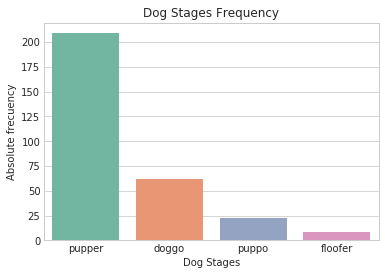

In [165]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.countplot('dog_stage', data=twitter_archive_clean, order=['pupper', 'doggo', 'puppo', 'floofer'])
plt.title('Dog Stages Frequency')
plt.xlabel('Dog Stages')
plt.ylabel('Absolute frecuency')
plt.show()

The most frequent dog stage according to the data available is "pupper", on the other hand, "floofer" is the less frequency category.

#### Insight N° 2

Bivariate analysis of `dog_stage` and `retweet_count` columns.

In [150]:
print('Average number of retweets according to the Dog Stage: \n', twitter_archive_clean.groupby('dog_stage')['retweet_count'].mean())

Average number of retweets according to the Dog Stage: 
 dog_stage
doggo      6743.677419
floofer    4328.750000
pupper     2251.334928
puppo      6522.608696
Name: retweet_count, dtype: float64


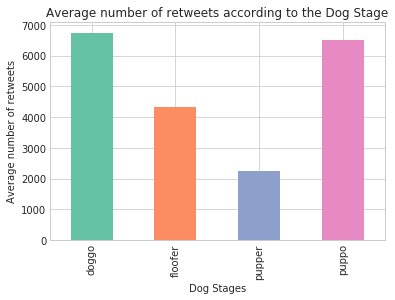

In [152]:
twitter_archive_clean.groupby('dog_stage')['retweet_count'].mean().plot(kind='bar')
plt.title('Average number of retweets according to the Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Average number of retweets')
plt.show();

According to the above figure, the dogs classified as "doggo" got 6500 retweets in average.

#### Insight N° 3

Bivariate analysis of `dog_stage` and `favorite_count` columns.

In [167]:
print('Average number of favorites according to the Dog Stage: \n', twitter_archive_clean.groupby('dog_stage')['favorite_count'].mean())

Average number of favorites according to the Dog Stage: 
 dog_stage
doggo      19384.483871
floofer    12864.500000
pupper      7150.081340
puppo      22344.521739
Name: favorite_count, dtype: float64


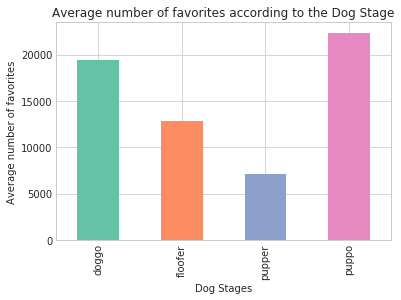

In [155]:
twitter_archive_clean.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Average number of favorites according to the Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Average number of favorites')
plt.show();

According to the above figure, the dogs classified as "puppo" got +20.000 favorites in average.